cluster          0   1   2   3   4   5   6   7   8   9
city                                                  
Anchorage       24   0   0   1  11   3   0   1   0  16
Atlanta          0   0  45   0   0   0   0   0   2   0
Atlantic City    0   7  38   0   0   0   0   0   0   0
Calgary          0   4   0   0   9   1   0  38   0   0
Chicago          0   2   1   0   0   1   0  48   0   0
Denver           0   0   9   0   0   0   0   0   0   0
Edmonton         3   0   0   0  25  16   0   4   0   3
Gander          13   0   0   9   1  10   0   4   0  14
Halifax          0   0   0   0   0  10   0  40   0   0
London           0   0   0   0   2   1   0  39   0   0
Los Angeles      0   0   0   0   0   0  39   0   0   0
Miami            0   0   0   0   0   0   0   0  43   0
Montreal         3   0   0   1   2  14   0   1   0   7
New Orleans      0   0   0   0   0   0   0   0  45   0
Ottawa           4   0   0   2  15  17   0   7   0   6
Portland         0  31   7   0   0   0   0   0   0   0
Québec    

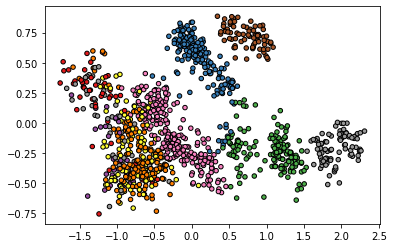

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

def get_pca(X):
    """
    Transform data to 2D points for plotting. Should return an array with shape (n, 2).
    """
    flatten_model = make_pipeline(
        MinMaxScaler(), PCA(2))
    X2 = flatten_model.fit_transform(X)
    assert X2.shape == (X.shape[0], 2)
    return X2


def get_clusters(X):
    """
    Find clusters of the weather data.
    """
    model = make_pipeline(
        KMeans(n_clusters=10)
    )
    model.fit(X)
    return model.predict(X)


def main():
    data = pd.read_csv('monthly-data-labelled.csv')

    X = data.iloc[:,2:].values
    y = data.city.values
    
    X2 = get_pca(X)
    clusters = get_clusters(X)
    plt.scatter(X2[:, 0], X2[:, 1], c=clusters, cmap='Set1', edgecolor='k', s=20)
    plt.savefig('clusters.png')

    df = pd.DataFrame({
        'cluster': clusters,
        'city': y,
    })
    counts = pd.crosstab(df['city'], df['cluster'])
    print(counts)


if __name__ == '__main__':
    main()